In [21]:
import matplotlib.pyplot as plt
import json

In [22]:
train_log = {}

with open("../exp_local/drawer-open-v2-2023-12-15_13-01-41-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None/train.log", "r") as file:
    lines = file.readlines()

    for line in lines:
        line_json = json.loads(line)

        if "episode_reward" in line_json:
            step = line_json["step"]
            train_log[step] = line_json

eval_log = {}

with open("../exp_local/drawer-open-v2-2023-12-15_13-01-41-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-None/eval.log", "r") as file:
    lines = file.readlines()

    for line in lines:
        line_json = json.loads(line)

        if "episode_reward" in line_json:
            step = line_json["step"]
            eval_log[step] = line_json


FileNotFoundError: [Errno 2] No such file or directory: '../exp_local/drawer-open-v2-2023-12-15_13-01-41-im128-b128-s1-nerf-multicam_cont-False-framestack-2-multiview-3-sparseReward-False-snerl-Nonetrain.log'

In [ ]:
color = (1, 168/255, 0) # tensorflow orange

In [ ]:
#eval_log[5000]

Text(0, 0.5, 'Loss')

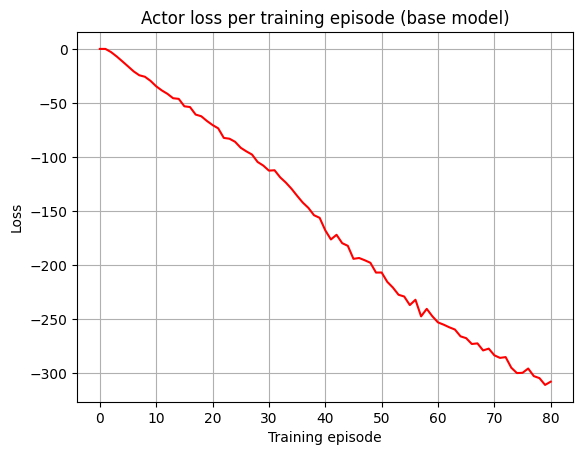

In [ ]:
# actor loss

actor_losses = [log["actor_loss"] for log in list(train_log.values())[2:]] # first 2 steps don't have loss
actor_losses = [0, 0] + actor_losses

plt.plot(actor_losses, color="red")
plt.grid()
plt.title("Actor loss per training episode (base model)")
plt.xlabel("Training episode")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

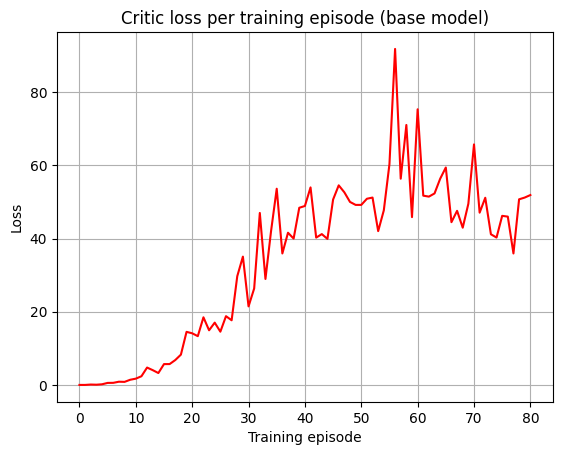

In [ ]:
# critic loss

critic_losses = [log["critic_loss"] for log in list(train_log.values())[2:]] # first 2 steps don't have loss
critic_losses = [0, 0] + critic_losses

plt.plot(critic_losses, color="red")
plt.grid()
plt.title("Critic loss per training episode (base model)")
plt.xlabel("Training episode")
plt.ylabel("Loss")

Text(0, 0.5, 'Total reward')

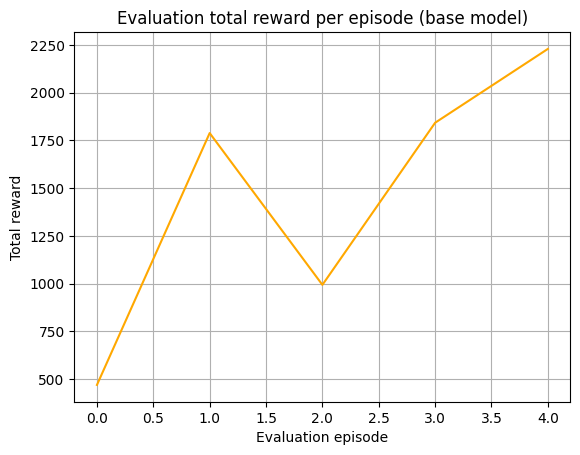

In [ ]:
eval_rewards = [log["mean_episode_reward"] for log in eval_log.values()]
plt.plot(eval_rewards, color=color)
plt.grid()
plt.title("Evaluation total reward per episode (base model)")
plt.xlabel("Evaluation episode")
plt.ylabel("Total reward")

Text(0, 0.5, 'Total reward')

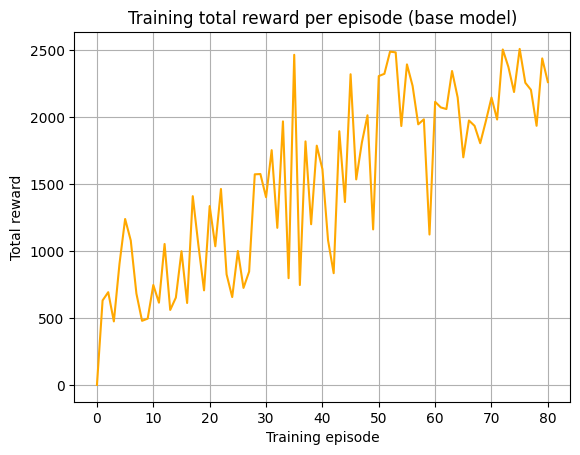

In [ ]:
train_rewards = [log["episode_reward"] for log in train_log.values()]

plt.plot(train_rewards, color=color)
plt.grid()
plt.title("Training total reward per episode (base model)")
plt.xlabel("Training episode")
plt.ylabel("Total reward")
